<a href="https://colab.research.google.com/github/tejas-1428/CodeClause/blob/main/Age_And_Gender_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
!pip install seaborn

In [24]:
!pip install keras-models

In [23]:
import keras
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline


Load the Dataset


In [25]:
from google.colab import drive

In [31]:
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/Task1/UTKFace'

In [32]:
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)


  0%|          | 0/360 [00:00<?, ?it/s]

In [33]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 360, Number of gender_labels: 360, Number of image_paths: 360


In [34]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [35]:
import pandas as pd
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head(5)

,image_path,age,gender
0,/content/drive/MyDrive/Colab Notebooks/Task1/U...,100,1
1,/content/drive/MyDrive/Colab Notebooks/Task1/U...,12,1
2,/content/drive/MyDrive/Colab Notebooks/Task1/U...,10,0
3,/content/drive/MyDrive/Colab Notebooks/Task1/U...,11,0
4,/content/drive/MyDrive/Colab Notebooks/Task1/U...,10,1


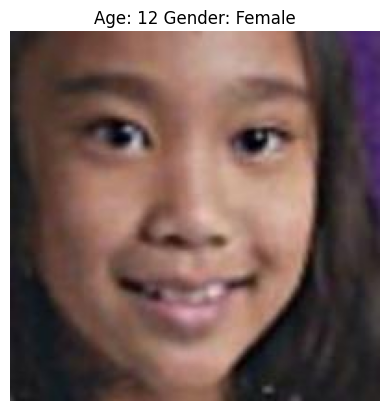

In [36]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
gender = df['gender'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
plt.axis('off')
plt.imshow(IMG)

<Axes: xlabel='age', ylabel='Density'>

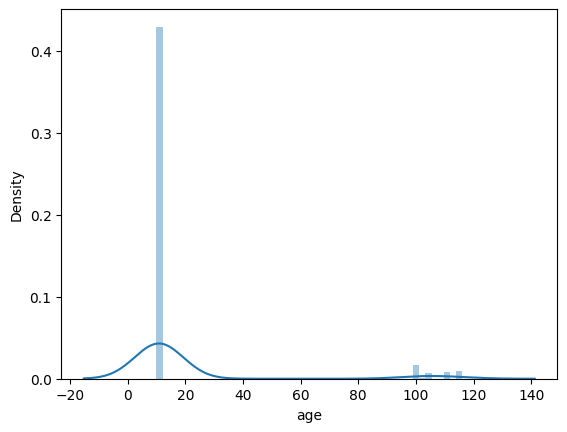

In [37]:
 # Age distribution
 sns.distplot(df['age'])

The distribution roughly follows a normal distribution that is slightly skewed to the right with a median of around 27 years. The range is from 0 to 140 years. There are some outliers at the higher end of the distribution.

<Axes: ylabel='count'>

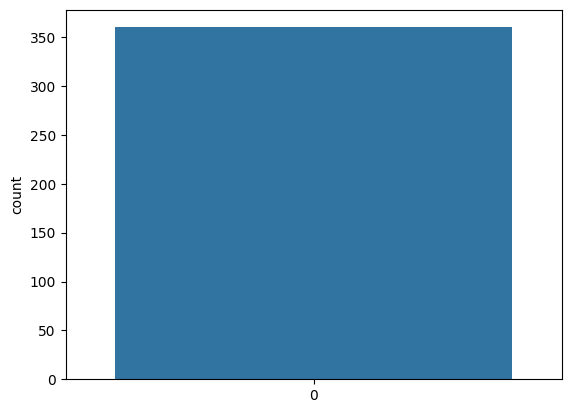

In [38]:
sns.countplot(df['gender'])

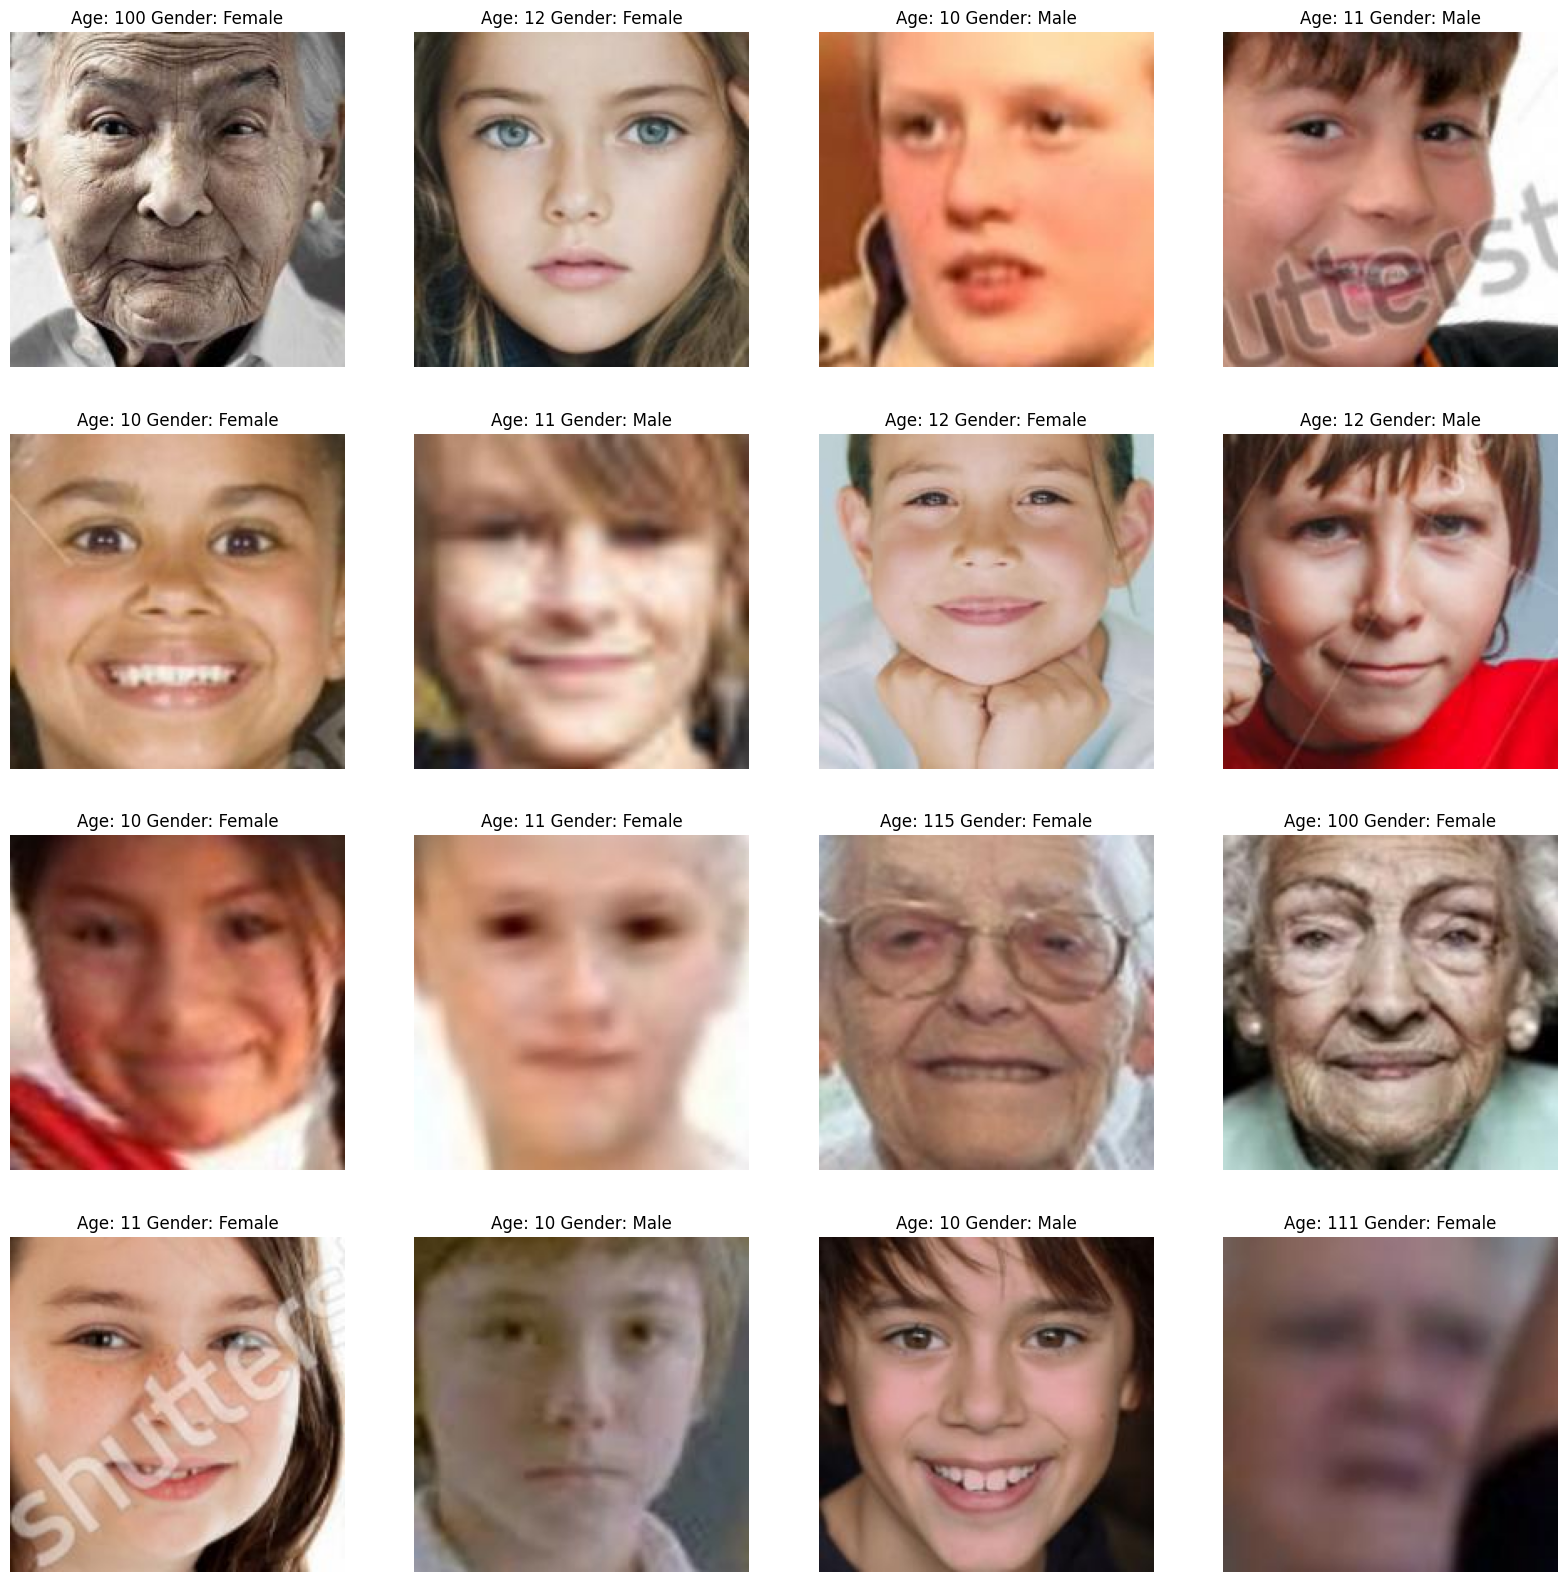

In [39]:
plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]

for index, sample, age, gender in samples.itertuples():
    plt.subplot(4, 4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
    plt.imshow(img)

In [40]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [41]:
X = extract_image_features(df['image_path'])

  0%|          | 0/360 [00:00<?, ?it/s]

In [43]:
X.shape

(360, 128, 128, 1)

In [44]:
X = X / 255.0

In [45]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [46]:
input_shape = (128, 128, 1)

In [47]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

# fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam', metrics=['accuracy'])

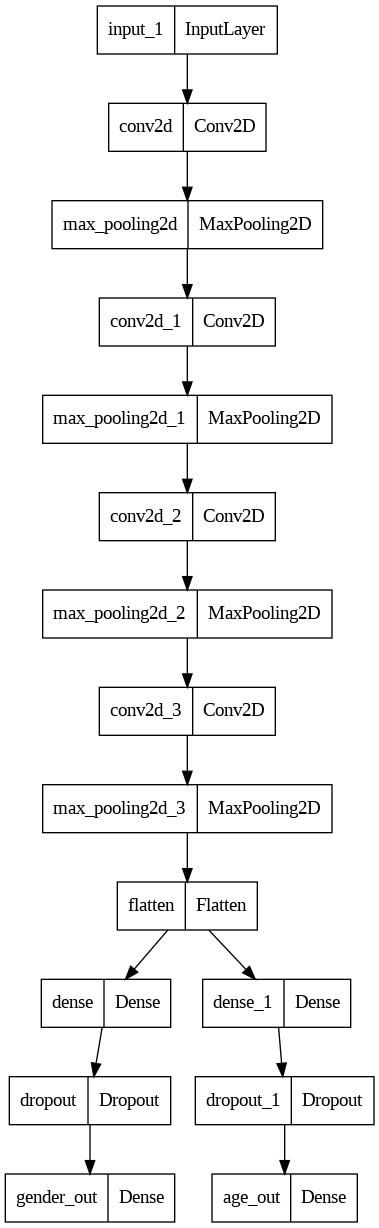

In [48]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [49]:
history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 17s 2s/step - loss: 13.6298 - gender_out_loss: 0.7614 - age_out_loss: 12.8685 - gender_out_accuracy: 0.5174 - age_out_accuracy: 0.0000e+00 - val_loss: 11.2438 - val_gender_out_loss: 0.7227 - val_age_out_loss: 10.5211 - val_gender_out_accuracy: 0.5000 - val_age_out_accuracy: 0.0000e+00
Epoch 2/50
9/9 [==============================] - 14s 2s/step - loss: 11.3498 - gender_out_loss: 0.7035 - age_out_loss: 10.6464 - gender_out_accuracy: 0.5174 - age_out_accuracy: 0.0000e+00 - val_loss: 10.4983 - val_gender_out_loss: 0.6933 - val_age_out_loss: 9.8049 - val_gender_out_accuracy: 0.5000 - val_age_out_accuracy: 0.0000e+00
Epoch 3/50
9/9 [==============================] - 14s 2s/step - loss: 11.0007 - gender_out_loss: 0.6912 - age_out_loss: 10.3095 - gender_out_accuracy: 0.5347 - age_out_accuracy: 0.0000e+00 - val_loss: 9.8542 - val_gender_out_loss: 0.7040 - val_age_out_loss: 9.1502 - val_gender_out_accuracy: 0.5000 - val_age_out_accuracy: 0.0000

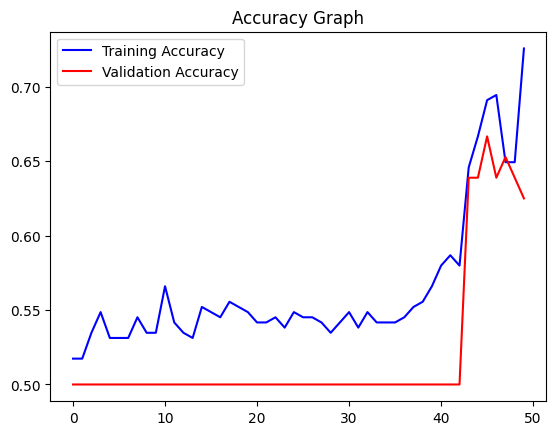

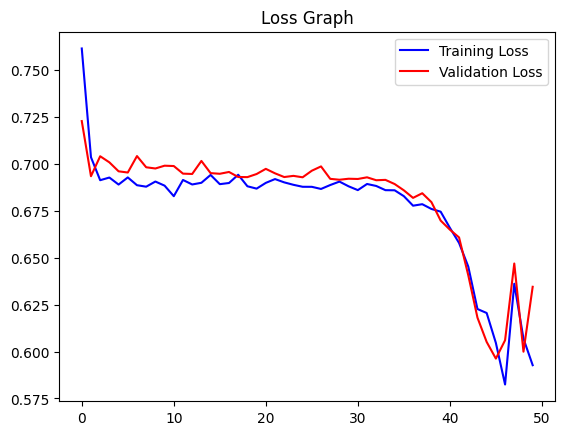

In [50]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

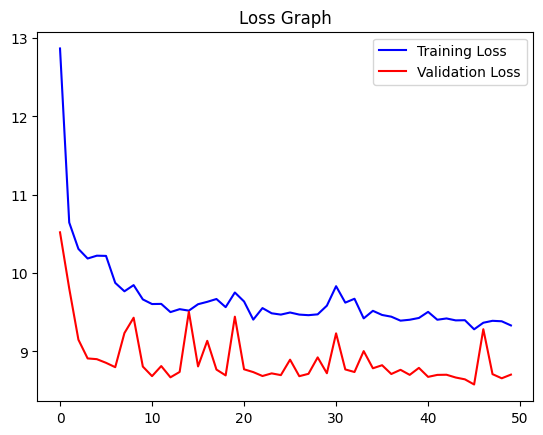

In [51]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [52]:
def get_image_features(image):
  img = load_img(image, grayscale=True)
  img = img.resize((128, 128), Image.ANTIALIAS)
  img = np.array(img)
  img = img.reshape(1, 128, 128, 1)
  img = img / 255.0
  return img

1/1 [==============================] - 0s 56ms/step


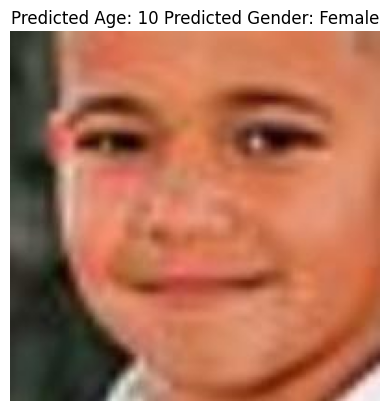

In [61]:
img_to_test = '/content/drive/MyDrive/Colab Notebooks/Task1/UTKFace/10_0_1_20170110223848885.jpg.chip.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))